In [117]:
import pandas as pd
#import sqlite3 as sql
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [118]:
engine = create_engine('postgresql://localhost:5432/company_db')
conn = engine.connect()

In [119]:
# departments table
pd.read_sql_query('select * from departments',conn)

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development
5,d006,Quality Management
6,d007,Sales
7,d008,Research
8,d009,Customer Service


In [120]:
# titles table
pd.read_sql_query('select * from titles',conn)

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [121]:
# employees table
pd.read_sql_query('select * from employees',conn)

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18
...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08


In [122]:
# dept_manager table
pd.read_sql_query('select * from dept_manager limit 5',conn)

,dept_no,emp_no
0,d001,110022
1,d001,110039
2,d002,110085
3,d002,110114
4,d003,110183


In [123]:
# dept_emp table
pd.read_sql_query('select * from dept_emp limit 5',conn)

,emp_no,dept_no
0,10001,d005
1,10002,d007
2,10003,d004
3,10004,d004
4,10005,d003


In [124]:
# salaries table
salary_df = pd.read_sql_query('select * from salaries',conn)
salary_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [125]:
# Create bins in which to place values based upon TED Talk views
bins = [0, 9999, 19999, 29999, 39999, 49999,
        59999, 69999, 79999, 89999, 99999,109999,119999,129999]

# Create labels for these bins
group_labels = ["0 to 9999k", "10k to 19k", "20k to 29k", "30k to 39k", "40k to 49k", "50k to 59k",
                "60k to 69k", "70k to 79k", "80k to 89k", "90k to 99k","100k to 109k","110k to 119k","120k to 129k"]

In [126]:
# Slice the data and place it into bins
pd.cut(salary_df["salary"], bins, labels=group_labels).head()

0    60k to 69k
1    60k to 69k
2    40k to 49k
3    40k to 49k
4    70k to 79k
Name: salary, dtype: category
Categories (13, object): [0 to 9999k < 10k to 19k < 20k to 29k < 30k to 39k ... 90k to 99k < 100k to 109k < 110k to 119k < 120k to 129k]

In [127]:
# Place the data series into a new column inside of the DataFrame
salary_df["salary Group"] = pd.cut(salary_df["salary"], bins, labels=group_labels)
salary_df.head()

,emp_no,salary,salary Group
0,10001,60117,60k to 69k
1,10002,65828,60k to 69k
2,10003,40006,40k to 49k
3,10004,40054,40k to 49k
4,10005,78228,70k to 79k


In [128]:
# Create a GroupBy object based upon "View Group"
salary_group = salary_df.groupby("salary Group")

# Find how many rows fall into each bin
print(salary_group["emp_no"].count())

salary Group
0 to 9999k           0
10k to 19k           0
20k to 29k           0
30k to 39k           0
40k to 49k      158465
50k to 59k       57915
60k to 69k       41413
70k to 79k       24814
80k to 89k       11845
90k to 99k        4284
100k to 109k      1069
110k to 119k       195
120k to 129k        24
Name: emp_no, dtype: int64


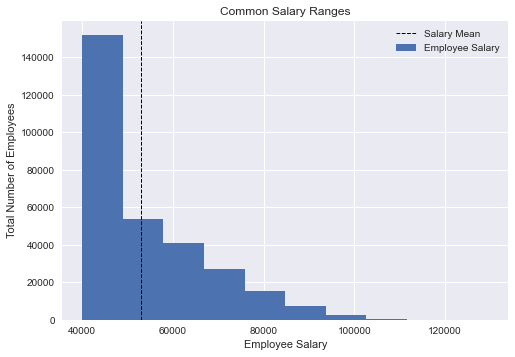

In [129]:
plt.style.use('seaborn')
plt.hist(salary_df['salary'],10,density=False,label='Employee Salary')
plt.axvline(salary_df['salary'].mean(), color='k', linestyle='dashed', linewidth=1, label="Salary Mean")
plt.xlabel("Employee Salary")
plt.ylabel("Total Number of Employees")
plt.legend() 
plt.title("Common Salary Ranges")
plt.savefig("Common Salary Ranges.png")

In [130]:
combined_df = pd.read_sql('select e.emp_no,e.emp_title_id,t.title,s.salary from employees e inner join titles as t on t.title_id = e.emp_title_id inner join salaries as s on s.emp_no = e.emp_no',conn)

In [131]:
combined_df.head()

,emp_no,emp_title_id,title,salary
0,57444,e0002,Engineer,48973
1,13616,e0003,Senior Engineer,40000
2,240129,e0004,Technique Leader,43548
3,427958,s0001,Staff,63377
4,35916,e0003,Senior Engineer,40000


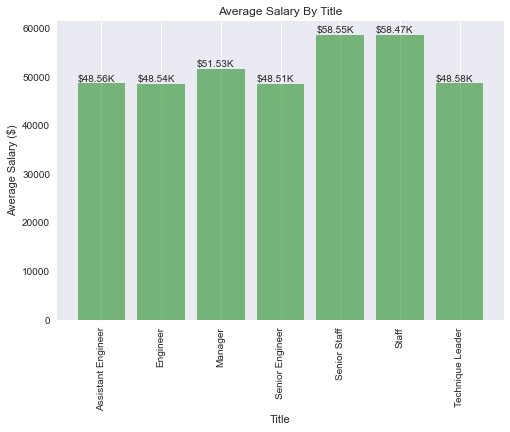

In [132]:
# Store the query
avg_salaries_by_title = combined_df.groupby(["title"]).mean()["salary"]

# Plot the Barchart
title_list = avg_salaries_by_title.index
avg_salary_for_title = avg_salaries_by_title.values

x_axis = np.arange(len(title_list))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, title_list, rotation=90)
plt.title("Average Salary By Title")
plt.xlabel("Title")
plt.ylabel("Average Salary ($)")
plt.grid(axis="y")
chart = plt.bar(x_axis, avg_salary_for_title, color="g", alpha=0.5, align="center")

for i in chart:
    yvalue = i.get_height()
    plt.text(i.get_x(), yvalue + 500, "${:,.2f}K".format(yvalue/1000))
    
plt.show()


In [133]:
pd.read_sql('select * from employees where emp_no=499942',conn)

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10
